# Ecuación de Difusión del calor 2D

Discutiremos la solución de la ecuación de difusión del calor bidimensional, 

$$
\frac{\partial^2 \psi}{\partial^2 x} + \frac{\partial^2 \psi}{\partial^2 y}-\frac{1}{\alpha}\frac{\partial \psi}{\partial t}=0,
$$

en el dominio $0<x<a$, $0<y<b$, $t\ge 0$, con las condiciones de borde

$$
\psi(0,y,t)=0, \qquad \psi(a,y,t)=0, \qquad \psi(x,0,y)=0, \qquad \psi(x,b,t)=0,
$$

y la condición inicial

\begin{align}
\psi(\vec{x},0) = \phi(\vec{x}).
\end{align}

En este caso, la solución es de la forma

$$
\psi(\vec{x},t) = \sum_{n,m=1}^\infty A_{nm} \sin\left(\frac{n\pi x}{a}\right)\sin\left(\frac{m\pi y}{b}\right) \exp\left(-\alpha\pi^2\left[\left(\frac{n}{a}\right)^2+\left(\frac{m}{b}\right)^2\right]t\right),
$$

con

$$
A_{nm} = \frac{4}{ab} \int_{x=0}^a \int_{y=0}^b \phi(x,y)\sin\left(\frac{n\pi x}{a}\right)\sin\left(\frac{m\pi y}{b}\right)\,dx
$$


## Ejemplo1: Perfil inicial Delta de Dirac

Primero consideraremos la solución simple que se encuentra en el caso que el perfil inicial de temperatura corresponde a una Delta de Dirac bidimensional, 

$$
\phi(\vec{x}) = T_0(ab)\, \delta^2(\vec{x}-\vec{x}_0) = T_0(ab)\, \delta(x- x_0)\delta(y- y_0),
$$
en cuyo caso

$$
A_{nm} = 4T_0\sin\left(\frac{n\pi x_0}{a}\right)\sin\left(\frac{m\pi y_0}{b}\right).
$$

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact
style.use('classic')

Definimos una función para evaluar nuestra solución

In [2]:
def Psi(x,y,t):
    S = 0
    for n in range(1,nmax+1):
        for m in range(1,mmax+1):
            S += A(n,m)*sin(n*pi*x/a)*sin(m*pi*y/b)*exp(-pi**2*alpha*((n/a)**2+(m/b)**2)*t)
    return S

In [3]:
def A(n,m):
    return 4*T0*sin(n*pi*x0/a)*sin(m*pi*y0/b)

Y otra función que la grafica:

In [4]:
def g(t):
    imshow(Psi(X,Y,t), origin='lower', extent=[0, a, 0, b], vmax=100)
    xlabel(r'$x$',fontsize=15)
    ylabel(r'$y$',fontsize=15)
    title(r'$\Psi(x,y,t), t=%.3f$' %t)
    colorbar()
    axes().set_aspect('equal')

In [5]:
a = 1.
b = 2.
alpha = 1.
T0 = 1.
nmax = 30
mmax = 30
x0 = 0.6*a
y0 = 0.7*b

x=linspace(0,a,200)
y=linspace(0,b,200)
X,Y = meshgrid(x,y)

Por ejemplo, podemos graficar la solución para $t=0.01$

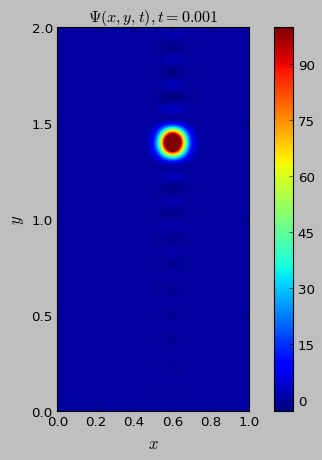

In [6]:
g(0.001)

Graficamos ahora en forma interactiva

<function __main__.g>

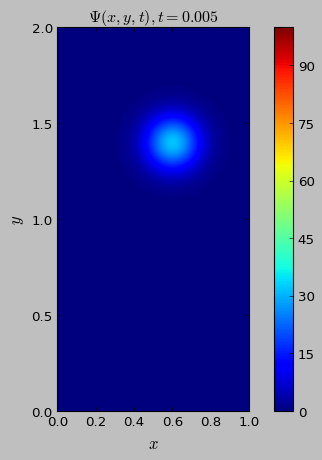

In [7]:
interact(g,t=(0.001,0.01,0.001))

In [8]:
def g2(t):
#    fig = figure(figsize=(6,6))
    fig = figure()
#    ax = fig.gca(projection='3d', adjustable='box')
    ax = fig.gca(projection='3d')
    ax.pbaspect = [1.0, 2.0, 10.]
    surf = ax.plot_surface(X, Y, Psi(X,Y,t), cmap=cm.jet, rstride=3, cstride=2, linewidth=0.1)
    #fig.colorbar(surf, shrink=0.6, aspect=8) #Se agrega barra de colores
    ax.set_xlabel('$x$',fontsize=15)
    ax.set_ylabel('$y$',fontsize=15)
    ax.set_title('$\psi(x,y,t)$',fontsize=15)
    #ax.set_aspect('equal', 'datalim')
    #ax.set_axis_off()

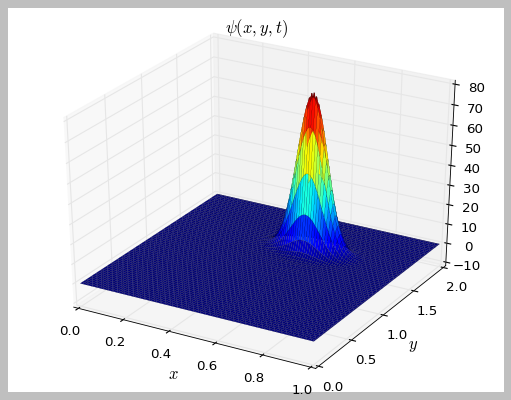

In [9]:
g2(0.002)

## Exportando animaciones a archivos .gif

Es posible crear una animación de la solución usando la función `FuncAnimation`. El código siguiente genera el archivo `difusion-calor-1D-Delta.gif` con la animación de la primera solución:

In [10]:
from matplotlib.animation import FuncAnimation

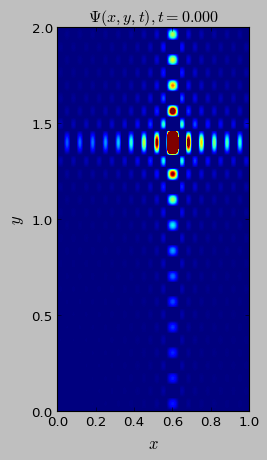

In [11]:
fig = figure()
ax = subplot()
ax.set_xlabel(r'$x$',fontsize=15)
ax.set_ylabel(r'$y$',fontsize=15)

cax = ax.imshow(Psi(X,Y,0.001), origin='lower', extent=[0, a, 0, b], vmax=100, vmin=0)
ax.set_aspect('equal')

def animate(i):
    t = 0.001*i
    ax.set_title(r'$\Psi(x,y,t), t=%.3f$' %t)
    cax.set_array(Psi(X,Y,t))
    
anim = FuncAnimation(fig, animate, interval=100, frames=30) #100 msec entre frames=10fps

anim.save('difusion-calor-2D-rectangulo.gif', writer='imagemagick')

Finalmente, una animación de la representación 3D de la misma solución.

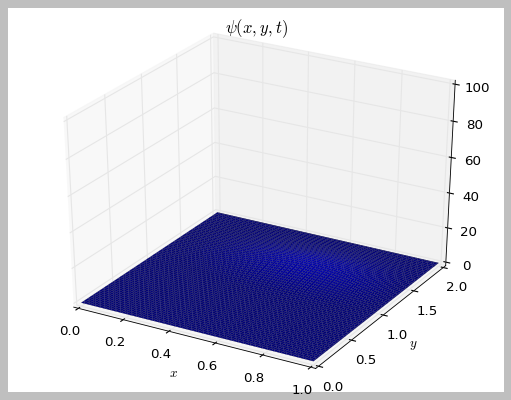

In [12]:
fig = figure()
ax = fig.gca(projection='3d')

# animation function
def animate(i):
    t = 0.001+0.001*i
    animate.p.remove()
    animate.p = ax.plot_surface(X, Y, Psi(X,Y,t), cmap=cm.jet, rstride=3, cstride=2, linewidth=0.1, vmax=100, vmin=0)
    return animate.p,

animate.p = ax.plot_surface(X, Y, Psi(X,Y,0.001), cmap=cm.jet, rstride=3, cstride=2, linewidth=0.1, vmax=100, vmin=0)
ax.set_zlim(0,100)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#ax.set_aspect('equal', 'datalim')
#ax.set_axis_off()
ax.set_title('$\psi(x,y,t)$',fontsize=15)
anim = FuncAnimation(fig, animate, interval=100, frames=30, repeat=True, blit=True)
anim.save('difusion-calor-2D-rectangulo-02.gif', writer='imagemagick')